# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json
import datetime


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
!pip install citipy
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 644


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url ='https://api.openweathermap.org/data/2.5/weather?q='
# url_params ='https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
       

    # Create endpoint URL with each city
    city_url = f'{url}{city}&units=metric&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))


    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
#         city_weather_params = requests.get(url_params, params={'appid':weather_api_key,'units':'metric','q':city}).json()
   

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | quelimane
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | burla
Processing Record 6 of Set 1 | tumut
Processing Record 7 of Set 1 | biryusinsk
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | omsukchan
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | mount gambier
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | yulara
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | iralaya
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 1 | banikoara
Proces

Processing Record 37 of Set 4 | ulladulla
Processing Record 38 of Set 4 | karaul
City not found. Skipping...
Processing Record 39 of Set 4 | qaanaaq
Processing Record 40 of Set 4 | touros
Processing Record 41 of Set 4 | tual
Processing Record 42 of Set 4 | saint marys
Processing Record 43 of Set 4 | comodoro rivadavia
Processing Record 44 of Set 4 | asau
Processing Record 45 of Set 4 | manthani
Processing Record 46 of Set 4 | union
Processing Record 47 of Set 4 | eydhafushi
Processing Record 48 of Set 4 | lafayette
Processing Record 49 of Set 4 | airai
Processing Record 0 of Set 5 | saint george
Processing Record 1 of Set 5 | taltal
Processing Record 2 of Set 5 | ambilobe
Processing Record 3 of Set 5 | arzgir
Processing Record 4 of Set 5 | mkushi
Processing Record 5 of Set 5 | korfovskiy
Processing Record 6 of Set 5 | elizabeth city
Processing Record 7 of Set 5 | sisimiut
Processing Record 8 of Set 5 | viedma
Processing Record 9 of Set 5 | sterling
Processing Record 10 of Set 5 | chuy


Processing Record 33 of Set 8 | matara
Processing Record 34 of Set 8 | necochea
Processing Record 35 of Set 8 | sorvag
City not found. Skipping...
Processing Record 36 of Set 8 | port hedland
Processing Record 37 of Set 8 | altamont
Processing Record 38 of Set 8 | acandi
Processing Record 39 of Set 8 | honolulu
Processing Record 40 of Set 8 | waverly
Processing Record 41 of Set 8 | myitkyina
Processing Record 42 of Set 8 | kavieng
Processing Record 43 of Set 8 | sakakah
Processing Record 44 of Set 8 | saint-pierre
Processing Record 45 of Set 8 | bichura
Processing Record 46 of Set 8 | araouane
Processing Record 47 of Set 8 | linxia
Processing Record 48 of Set 8 | meulaboh
Processing Record 49 of Set 8 | bonito
Processing Record 0 of Set 9 | faya
Processing Record 1 of Set 9 | maldonado
Processing Record 2 of Set 9 | price
Processing Record 3 of Set 9 | avera
Processing Record 4 of Set 9 | bethel
Processing Record 5 of Set 9 | awjilah
Processing Record 6 of Set 9 | cherskiy
Processing R

Processing Record 22 of Set 12 | sibenik
Processing Record 23 of Set 12 | gurskoye
City not found. Skipping...
Processing Record 24 of Set 12 | priargunsk
Processing Record 25 of Set 12 | jacmel
Processing Record 26 of Set 12 | port lincoln
Processing Record 27 of Set 12 | canar
Processing Record 28 of Set 12 | lavrentiya
Processing Record 29 of Set 12 | ormara
Processing Record 30 of Set 12 | neiafu
Processing Record 31 of Set 12 | nurota
Processing Record 32 of Set 12 | kjopsvik
Processing Record 33 of Set 12 | jardim
Processing Record 34 of Set 12 | yeppoon
Processing Record 35 of Set 12 | otane
Processing Record 36 of Set 12 | khanpur
Processing Record 37 of Set 12 | cairns
Processing Record 38 of Set 12 | avila
Processing Record 39 of Set 12 | wainwright
Processing Record 40 of Set 12 | maneromango
Processing Record 41 of Set 12 | ihosy
Processing Record 42 of Set 12 | halifax
Processing Record 43 of Set 12 | cap-aux-meules
Processing Record 44 of Set 12 | muzaffarabad
Processing 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,10.27,38,21,2.63,NZ,1670292522
1,quelimane,-17.8786,36.8883,25.12,84,20,2.24,MZ,1670292523
2,souillac,-20.5167,57.5167,24.59,79,51,6.71,MU,1670292523
3,kapaa,22.0752,-159.3190,26.18,86,75,6.17,US,1670292524
4,burla,21.5000,83.8667,17.11,54,0,1.10,IN,1670292524


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,10.27,38,21,2.63,NZ,1670292522
1,quelimane,-17.8786,36.8883,25.12,84,20,2.24,MZ,1670292523
2,souillac,-20.5167,57.5167,24.59,79,51,6.71,MU,1670292523
3,kapaa,22.0752,-159.3190,26.18,86,75,6.17,US,1670292524
4,burla,21.5000,83.8667,17.11,54,0,1.10,IN,1670292524


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

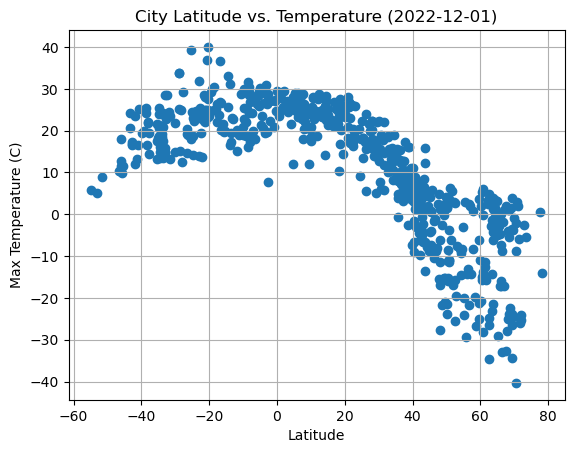

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Temperature (2022-12-01)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

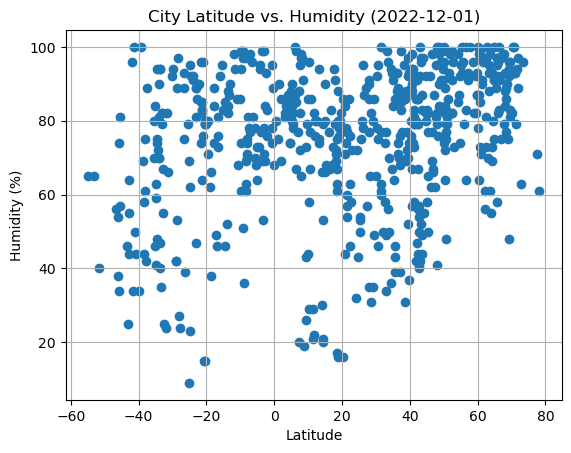

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])


# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity (2022-12-01)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

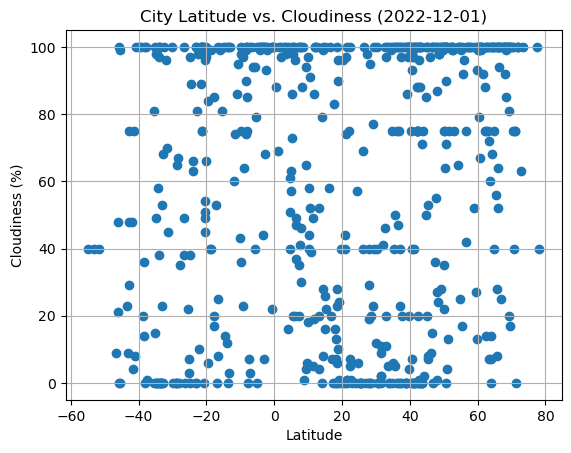

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (2022-12-01)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

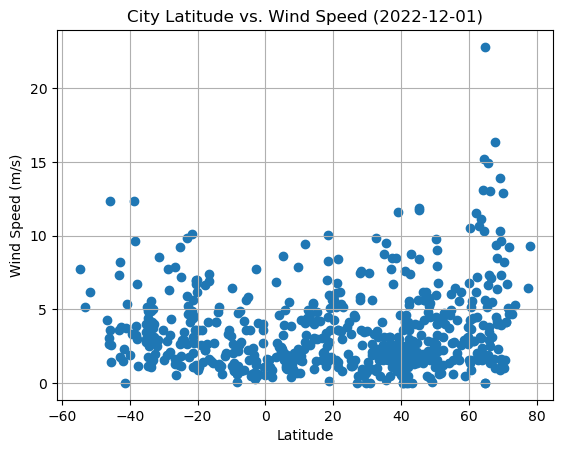

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed (2022-12-01)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def lin_reg(x,y,label1,label2):
    y_slope, y_int, y_r, y_p, y_std_err = linregress(x,y)
    y_fit = y_slope * x + y_int
    line_eq = f'y = {str(round(y_slope,2))} x + {str(round(y_int))}'
    plt.scatter(x,y)
    plt.plot(x,y_fit,"r")
    plt.annotate(line_eq,(-2,15), fontsize =15, color="red")
    plt.xlabel(str(label1))
    plt.ylabel(str(label2))
    print(f'The r-value is:{y_r}')
    print(f'With a p-value of: {round(y_p,5)}')
    plt.show()
    

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,kapaa,22.0752,-159.3190,26.18,86,75,6.17,US,1670292524
4,burla,21.5000,83.8667,17.11,54,0,1.10,IN,1670292524
6,biryusinsk,55.9634,97.8235,-14.29,79,96,6.41,RU,1670292525
9,san patricio,28.0170,-97.5169,22.31,86,29,5.62,US,1670292526
10,omsukchan,62.5333,155.8000,-24.92,97,100,1.62,RU,1670292527


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,10.27,38,21,2.63,NZ,1670292522
1,quelimane,-17.8786,36.8883,25.12,84,20,2.24,MZ,1670292523
2,souillac,-20.5167,57.5167,24.59,79,51,6.71,MU,1670292523
5,tumut,-35.3000,148.2167,21.51,46,15,3.43,AU,1670292525
7,ushuaia,-54.8000,-68.3000,5.79,65,40,7.72,AR,1670292525


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8427347100020945
With a p-value of: 0.0


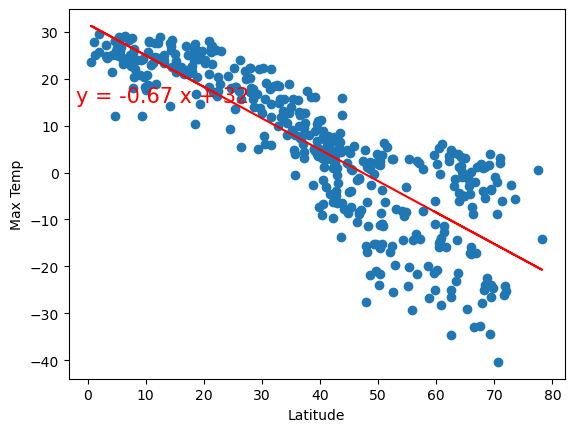

In [41]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Latitude","Max Temp")


The r-value is:0.48979153728739244
With a p-value of: 0.0


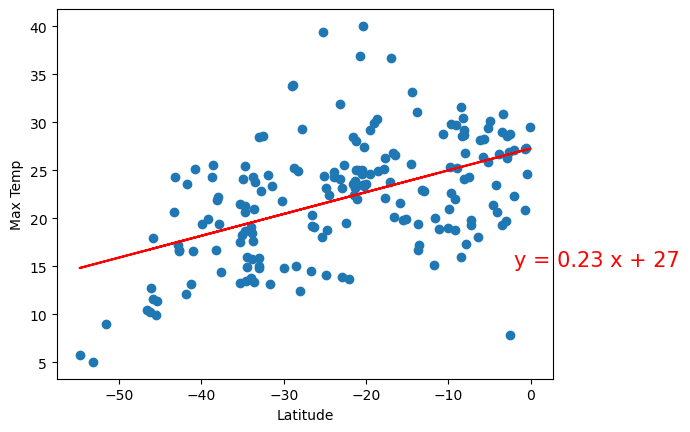

In [42]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],"Latitude","Max Temp")

**Discussion about the linear relationship:** Regarding botht hemispheres the more you approche the equator (0) the the greater the average temperature. Therefore in the the northern hemisphere the regression lines slope is negative while in the southern hemisphere the regresson's slope is positive. From this graph you can also tell that it is currently winter in the norther hemisphere due to the high slope of the northern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.3002165661204474
With a p-value of: 0.0


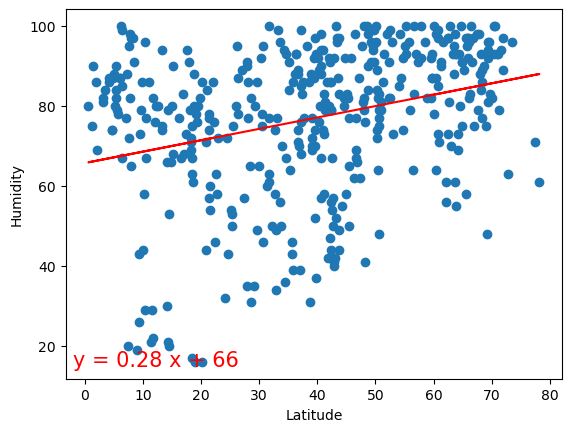

In [43]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude","Humidity")

The r-value is:0.34071700461034976
With a p-value of: 0.0


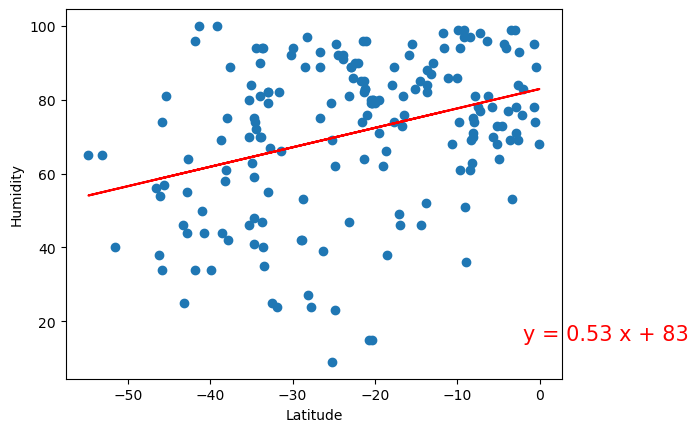

In [44]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],"Latitude","Humidity")

**Discussion about the linear relationship:** The regression lines for both the northern and southern hemisphere had a correlation when increasing in latitue. The correlation's r-value for the southern hemisphere was 0.22 meaning that the effectsize was small. Meanwhile, the Northern hemispheres r-value was 0.41.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.2583178912163286
With a p-value of: 0.0


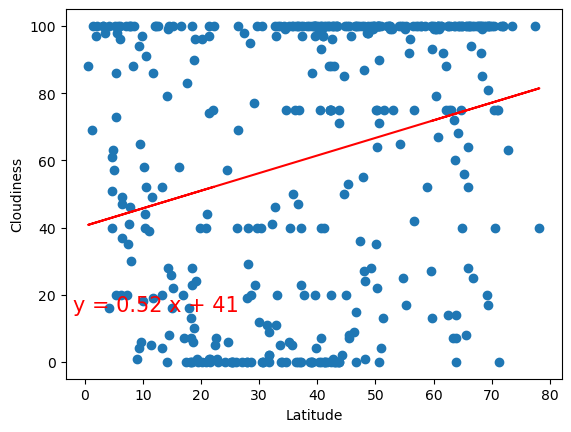

In [45]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude","Cloudiness")

The r-value is:0.3321131311992519
With a p-value of: 0.0


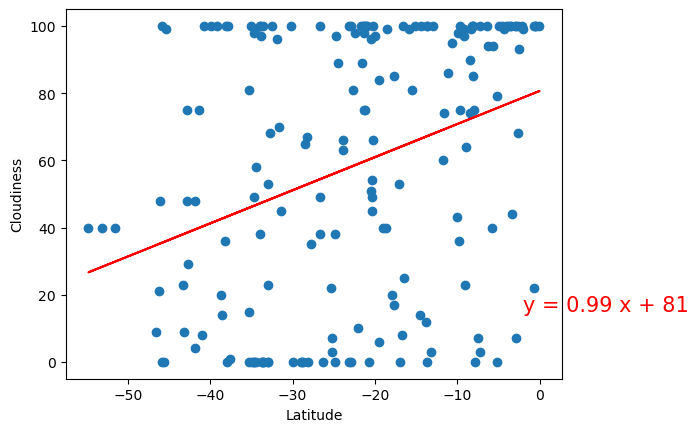

In [46]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],"Latitude","Cloudiness")

**Discussion about the linear relationship:** The regression lines for both the northern and southern hemisphere had a correlation when increasing in latitue. Both the northern and southern hemisphere's regression lines' r-value were less then 0.3 and can therefore be considered to have a small effect.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.2662824778832449
With a p-value of: 0.0


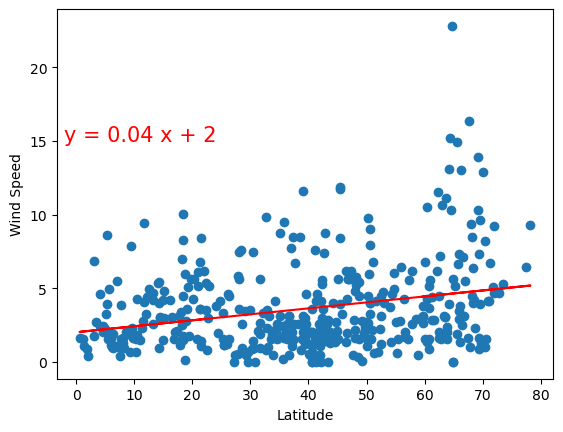

In [47]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude","Wind Speed")

The r-value is:-0.30438556454617033
With a p-value of: 3e-05


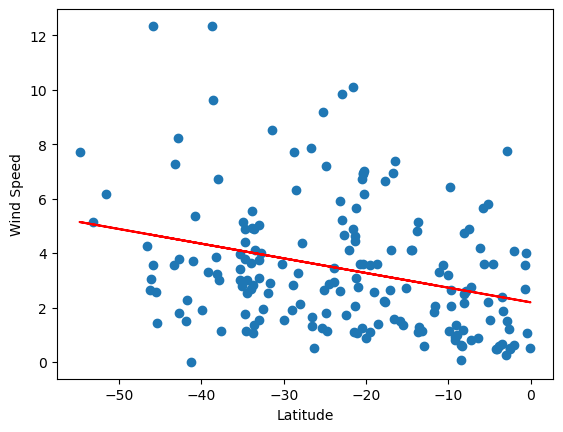

In [49]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],"Latitude","Wind Speed")

**Discussion about the linear relationship:** The regression lines of wind trended upwards the further away from the equator(0) the city was.